In [1]:
import sys
import csv
from sklearn import tree
from sklearn import preprocessing
import matplotlib
import graphviz
import numpy as np

In [2]:
szDatasetPath = 'breast_cancer.csv'
#szDatasetPath = 'titanic_train.csv'

'''
Read the data from the csv file
listColNames[j] stores the jth column name
listData[i][:-1] are the features of the ith example
listData[i][-1] is the target value of the ith example
'''
listColNames = [] # The list of column names
listData = [] # The list of feature vectors of all the examples
nRow = 0
with open(szDatasetPath) as csvFile:
    csvReader = csv.reader(csvFile, delimiter=',')
    for row in csvReader:
        if 0 == nRow:
            listColNames = row
        else:
            listData.append(row)
        nRow += 1

'''
Scan the data and store the unique values of each column.
listColUniqueVals[j] stores a list of unique values of the jth column
'''
listColUniqueVals = [[] for i in range(len(listColNames))]
for example in listData:
    for i in range(len(example)):
        if example[i] not in listColUniqueVals[i]:
            listColUniqueVals[i].append(example[i])


In [ ]:
listColNames

In [ ]:
listColUniqueVals

In [ ]:
listData

In [3]:
#Calculate entropy of an array
def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))

    return - probs.dot(np.log2(probs))

In [4]:
#Compute the value of information gain = entropy before - entropy after
def informationGain(parent, left, right):
    entropyAfter = (len(left)/len(parent))*entropy(left) + (len(right)/len(parent))*entropy(right)
    return (entropy(parent) - entropyAfter)

In [16]:
def trainErrorRate(parent,left,right):
    maxCountLeft=0
    maxCountRight=0
    if(left.count(1)>=left.count(0)):
        maxCountLeft=left.count(1)
    else:
        maxCountLeft=left.count(0)
    if(right.count(1)>=right.count(0)):
        maxCountRight=right.count(1)
    else:
        maxCountRight=right.count(0)
    return (maxCountLeft+maxCountRight)/len(parent)

In [6]:
#Label encoder to use when encoding features and labels
le = preprocessing.LabelEncoder()

In [7]:
#Encode the label array
classCol = [row[-1] for row in listData]
classColEncoded = le.fit_transform(classCol)

In [19]:
#Iterate through all features
for i in range(0,len(listColNames)-1):
    #Create a feature array, then encode it for decision tree
    featureCol = [row[i] for row in listData]
    featureCol = le.fit_transform(featureCol)
    
    #Print out feature values and feature names, for debug
    #print(featureCol)
    print(listColNames[i])
    
    #Variables to save best split point
    bestSplit = 0
    maxInfoGain = 0
    
    #Since the encoded features are ints like 0,1,2,3,4,5, then we separate the data by using 0.5,1.5,2.5,3.5,etc
    for i in range(len(listColUniqueVals[i])):
        i2= i+0.5
        
        #Label arrays of 2 parts of the separated data, will be used to calculate entropy
        left = []
        right = []
        for x in range(len(featureCol)):
            if(featureCol[x]<i2):
                left.append(classColEncoded[x])
            elif(featureCol[x]>i2):
                right.append(classColEncoded[x])
        
        #Print entropy and information gain, for debug
        #print("left node entropy " + str(i2) + ": "+str(entropy(left)))
        #print("right node entropy " + str(i2) + ": "+str(entropy(right)))
        #print("info gained ",str(i2),str(informationGain(classColEncoded.tolist(),left,right)))
        infoGain = informationGain(classColEncoded.tolist(),left,right)
        #Choose best information gain value to split
        if(infoGain > maxInfoGain):
            maxInfoGain = infoGain
            bestSplit = i2
        #Make a decision tree model
    print("Best split ",bestSplit, " Info gained", maxInfoGain)
    print("Train error ",trainErrorRate(classColEncoded.tolist(),left,right))
    print()

age
Best split  1.5  Info gained 0.0057238358997364625
Train error  0.7027972027972028

menopause
Best split  1.5  Info gained 0.0019842575782600402
Train error  0.7027972027972028

tumor-size
Best split  1.5  Info gained 0.03734558688803524
Train error  0.7027972027972028

inv-nodes
Best split  0.5  Info gained 0.06286759046690138
Train error  0.7027972027972028

node-caps
Best split  1.5  Info gained 0.05136145395409386
Train error  0.7027972027972028

deg-malig
Best split  1.5  Info gained 0.0754168448376169
Train error  0.7027972027972028

breast
Best split  0.5  Info gained 0.0024889884332655043
Train error  0.7027972027972028

breast-quad
Best split  0.5  Info gained 0.006141521610073308
Train error  0.7027972027972028

irradiat
Best split  0.5  Info gained 0.025819023909141148
Train error  0.7027972027972028



In [11]:
ageCol = [row[0] for row in listData]
ageCol = le.fit_transform(ageCol)
print(entropy(classColEncoded.tolist()))
for i in range(len(listColUniqueVals[0])):
    i2= i+0.5
    less = []
    more = []
    for x in range(len(ageCol)):
        if(ageCol[x]<i2):
            less.append(classColEncoded[x])
        elif(ageCol[x]>i2):
            more.append(classColEncoded[x])
    print("less than entropy " + str(i2) + ": "+str(entropy(less)))
    print("more than entropy " + str(i2) + ": "+str(entropy(more)))

0.8778446951746506
less than entropy 0.5: -0.0
more than entropy 0.5: 0.8791357668533336
less than entropy 1.5: 0.9740248644357521
more than entropy 1.5: 0.8569784970622595
less than entropy 2.5: 0.9156487708004133
more than entropy 2.5: 0.8420956603976348
less than entropy 3.5: 0.8818383667221814
more than entropy 3.5: 0.863120568566631
less than entropy 4.5: 0.8812908992306927
more than entropy 4.5: 0.6500224216483541
less than entropy 5.5: 0.8778446951746506
more than entropy 5.5: -0.0


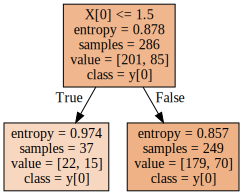

In [12]:
clf2 = tree.DecisionTreeClassifier(max_depth=1,criterion='entropy')
clf2.fit(ageCol.reshape(-1,1),classColEncoded)
dot_data = tree.export_graphviz(clf2, out_file=None,filled=True, class_names=True)
graph = graphviz.Source(dot_data)
graph

In [13]:
print(clf2.score(ageCol.reshape(-1,1),classColEncoded))

0.7027972027972028
